In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from sktime.datasets import load_from_tsfile

from sklearn.ensemble import RandomForestClassifier

import os
import time
import re
import random

from sktime.classification.sklearn import RotationForest

 
from sktime.classification.kernel_based import RocketClassifier

equalLengthProblems=[	
                                #Train Size, Test Size, Series Length, Nos Classes
"ACSF1",
"Adiac",        # 390,391,176,37
"ArrowHead",    # 36,175,251,3
"Beef",         # 30,30,470,5
"BeetleFly",    # 20,20,512,2
"BirdChicken",  # 20,20,512,2
"BME",
"Car",          # 60,60,577,4
"CBF",                      # 30,900,128,3
"Chinatown",
"ChlorineConcentration",    # 467,3840,166,3
"CinCECGTorso", # 40,1380,1639,4
"Coffee", # 28,28,286,2
"Computers", # 250,250,720,2
"CricketX", # 390,390,300,12
"CricketY", # 390,390,300,12
"CricketZ", # 390,390,300,12
"Crop",
"DiatomSizeReduction", # 16,306,345,4
"DistalPhalanxOutlineAgeGroup", # 400,139,80,3
"DistalPhalanxOutlineCorrect", # 600,276,80,2
"DistalPhalanxTW", # 400,139,80,6
"Earthquakes", # 322,139,512,2
"ECG200",   #100, 100, 96
"ECG5000",  #4500, 500,140
"ECGFiveDays", # 23,861,136,2
"ElectricDevices", # 8926,7711,96,7
"EOGHorizontalSignal",
"EOGVerticalSignal",
"EthanolLevel",
"FaceAll", # 560,1690,131,14
"FaceFour", # 24,88,350,4
"FacesUCR", # 200,2050,131,14
"FiftyWords", # 450,455,270,50
"Fish", # 175,175,463,7
"FordA", # 3601,1320,500,2
"FordB", # 3636,810,500,2
"FreezerRegularTrain",
"FreezerSmallTrain",
#                        "Fungi", removed because only one instance per class in train. This is a query problem
"GunPoint", # 50,150,150,2
"GunPointAgeSpan",
"GunPointMaleVersusFemale",
"GunPointOldVersusYoung",                        
"Ham",      #105,109,431
"HandOutlines", # 1000,370,2709,2
"Haptics", # 155,308,1092,5
"Herring", # 64,64,512,2
"HouseTwenty",
"InlineSkate", # 100,550,1882,7
"InsectEPGRegularTrain",
"InsectEPGSmallTrain",
"InsectWingbeatSound",#1980,220,256
"ItalyPowerDemand", # 67,1029,24,2
"LargeKitchenAppliances", # 375,375,720,3
"Lightning2", # 60,61,637,2
"Lightning7", # 70,73,319,7
"Mallat", # 55,2345,1024,8
"Meat",#60,60,448
"MedicalImages", # 381,760,99,10
"MiddlePhalanxOutlineAgeGroup", # 400,154,80,3
"MiddlePhalanxOutlineCorrect", # 600,291,80,2
"MiddlePhalanxTW", # 399,154,80,6
"MixedShapesRegularTrain",
"MixedShapesSmallTrain",
"MoteStrain", # 20,1252,84,2
"NonInvasiveFetalECGThorax1", # 1800,1965,750,42
"NonInvasiveFetalECGThorax2", # 1800,1965,750,42
"OliveOil", # 30,30,570,4
"OSULeaf", # 200,242,427,6
"PhalangesOutlinesCorrect", # 1800,858,80,2
"Phoneme",#1896,214, 1024
"PigAirwayPressure",
"PigArtPressure",
"PigCVP",
"Plane", # 105,105,144,7
"PowerCons",
"ProximalPhalanxOutlineAgeGroup", # 400,205,80,3
"ProximalPhalanxOutlineCorrect", # 600,291,80,2
"ProximalPhalanxTW", # 400,205,80,6
"RefrigerationDevices", # 375,375,720,3
"Rock",
"ScreenType", # 375,375,720,3
"SemgHandGenderCh2",
"SemgHandMovementCh2",
"SemgHandSubjectCh2",
"ShapeletSim", # 20,180,500,2
"ShapesAll", # 600,600,512,60
"SmallKitchenAppliances", # 375,375,720,3
"SmoothSubspace",
"SonyAIBORobotSurface1", # 20,601,70,2
"SonyAIBORobotSurface2", # 27,953,65,2
"StarLightCurves", # 1000,8236,1024,3
"Strawberry",#370,613,235
"SwedishLeaf", # 500,625,128,15
"Symbols", # 25,995,398,6
"SyntheticControl", # 300,300,60,6
"ToeSegmentation1", # 40,228,277,2
"ToeSegmentation2", # 36,130,343,2
"Trace", # 100,100,275,4
"TwoLeadECG", # 23,1139,82,2
"TwoPatterns", # 1000,4000,128,4
"UMD",
"UWaveGestureLibraryAll", # 896,3582,945,8
"UWaveGestureLibraryX", # 896,3582,315,8
"UWaveGestureLibraryY", # 896,3582,315,8
"UWaveGestureLibraryZ", # 896,3582,315,8
"Wafer", # 1000,6164,152,2
"Wine",#54	57	234
"WordSynonyms", # 267,638,270,25
"Worms", #77, 181,900,5
"WormsTwoClass",#77, 181,900,5
"Yoga" # 300,3000,426,2
]   

un_normal = ['BME',
 'Chinatown',
 'Crop',
 'EOGHorizontalSignal',
 'EOGVerticalSignal',
 'GunPointAgeSpan',
 'GunPointMaleVersusFemale',
 'GunPointOldVersusYoung',
 'HouseTwenty',
 'InsectEPGRegularTrain',
 'InsectEPGSmallTrain',
 'PigAirwayPressure',
 'PigArtPressure',
 'PigCVP',
 'PowerCons',
 'Rock',
 'SemgHandGenderCh2',
 'SemgHandMovementCh2',
 'SemgHandSubjectCh2',
 'SmoothSubspace',
 'UMD']


In [2]:
def normalize(x):
    for a in range(x.shape[0]):
        x[a] = (x[a]-x[a].mean())/x.std()

In [4]:
train_xs = []
train_ys = []
test_xs = []
test_ys = []
for dataset_name in equalLengthProblems:
    in_class_distance = []
    train_x, train_y = load_from_tsfile(f"/home/yunrui/data/Univariate_ts/{dataset_name}/{dataset_name}_TRAIN.ts", return_data_type="numpy2d")
    test_x, test_y = load_from_tsfile(f"/home/yunrui/data/Univariate_ts/{dataset_name}/{dataset_name}_TEST.ts", return_data_type="numpy2d")
    if dataset_name in un_normal:
        normalize(train_x)
        normalize(test_x)
    train_xs.append(train_x)
    train_ys.append(train_y)
    test_xs.append(test_x)
    test_ys.append(test_y)

FileNotFoundError: [Errno 2] No such file or directory: '/home/yunrui/data/Univariate_ts/ACSF1/ACSF1_TRAIN.ts'

In [ ]:
# Lets use tab-rotf, ker-minirocket, dict-WEASEL, fea-catch22, interval-CIF, dis-1nn-dtw
# shapelet we can use STC but it is gonna take forever, maybe consider usingt he fast shapelet

In [ ]:


class logger:
    def __init__(self, algo_list, datasets, log_name):
        self.df = pd.DataFrame(columns=algo_list, index=datasets)
        self.n_algo = len(algo_list)
        self.n_dataset = len(datasets)
        self.log_name = log_name
        
    def log(self, dataset, results):
        # check if the dataset is in the 
        self.df.loc[dataset] = results
        self.df.to_csv(f"./result/{self.log_name}.csv")



# simple gussian noise
# length is the percentage of the original ts that you want to add to each side
def add_pad(train_x, test_x, std, padding_length):
    np.random.seed(0)
    train_x_aug = []
    test_x_aug = []
    padd = padding_length
    for a in range(train_x.shape[0]):
        front_mean = train_x[a][0]
        back_mean = train_x[a][-1]
        front_pad = np.random.normal(front_mean, std, padd)
        back_pad = np.random.normal(back_mean, std, padd)
        train_x_aug.append(np.concatenate([front_pad, train_x[a], back_pad]))

    for a in range(test_x.shape[0]):
        front_mean = test_x[a][0]
        back_mean = test_x[a][-1]
        front_pad = np.random.normal(front_mean, std, padd)
        back_pad = np.random.normal(back_mean, std, padd)
        test_x_aug.append(np.concatenate([front_pad, test_x[a], back_pad]))

    train_x_aug = np.array(train_x_aug)
    test_x_aug = np.array(test_x_aug)
    return train_x_aug, test_x_aug

In [ ]:
def shift_ts(train_x, test_x, padding):
    padd = padding
    np.random.seed(0)
    
    train_x_aug_shifted = []
    test_x_aug_shifted = []

    for a in range(train_x_aug.shape[0]):
        random_shift_left = np.random.randint(1, padd)  # Include max_value in the range
        random_shift_right = padd-random_shift_left
        train_x_aug_shifted.append(train_x_aug[a][padd-random_shift_left:-(padd-random_shift_right)])

    for a in range(test_x_aug.shape[0]):
        random_shift_left = np.random.randint(1, padd)  # Include max_value in the range
        random_shift_right = padd-random_shift_left
        test_x_aug_shifted.append(test_x_aug[a][padd-random_shift_left:-(padd-random_shift_right)])

    train_x_aug_shifted=np.array(train_x_aug_shifted)
    test_x_aug_shifted=np.array(test_x_aug_shifted)
    
    return train_x_aug_shifted, test_x_aug_shifted

In [ ]:
padding = 0.2
my_log = logger(["RotationForest", "RotationForest_AUG"], equalLengthProblems, f"RotationForest{padding}")
for dataset in range(len(equalLengthProblems)):
    
    print(f"for dataset {equalLengthProblems[dataset]}")
    train_x = train_xs[dataset]
    train_y = train_ys[dataset]
    test_x = test_xs[dataset]
    test_y = test_ys[dataset]
    
    padding_length = int(train_x.shape[1]*padding)
    train_x_aug, test_x_aug = add_pad(train_x, test_x, 1, padding_length)
    train_x_aug_shifted, test_x_aug_shifted = shift_ts(train_x_aug, test_x_aug, padding_length)
    
    result = []
    # for augumented dataset
    random.seed(0)
    np.random.seed(0)
    clf = RotationForest(n_jobs=20)
    clf.fit(train_x_aug_shifted, train_y)
    y_pred = clf.predict(test_x_aug_shifted)
    cr_1 = classification_report(test_y, y_pred, output_dict= True)
    result.append(cr_1['accuracy'])
    
    # for original dataset
    random.seed(0)
    np.random.seed(0)
    clf = RotationForest(n_jobs=20)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    cr_2 = classification_report(test_y, y_pred, output_dict= True)
    result.append(cr_2['accuracy'])
    
    my_log.log(equalLengthProblems[dataset], result)

# Inspect the aug dataset

In [3]:
def add_seqpad(train_x, test_x, padding_length, std=0.01):
    train_x_aug = []
    test_x_aug = []
    
    for i in range(train_x.shape[0]):
        # for front pad
        front_pad = []
        cur_mean = train_x[i][0]
        for a in range(padding_length):
            cur_mean = np.random.normal(cur_mean, std, 1)
            front_pad.append(cur_mean)
        front_pad = np.array(front_pad).flatten()
        front_pad = np.flip(front_pad)
        # for end pad
        end_pad = []
        cur_mean = train_x[i][-1]
        for b in range(padding_length):
            cur_mean = np.random.normal(cur_mean, std, 1)
            end_pad.append(cur_mean)
            
        end_pad = np.array(end_pad).flatten()
        train_x_aug.append(np.concatenate([front_pad, train_x[i], end_pad]))
    
    
    for i in range(test_x.shape[0]):
        # for end pad
        front_pad = []
        cur_mean = test_x[i][0]
        for a in range(padding_length):
            cur_mean = np.random.normal(cur_mean, std, 1)
            front_pad.append(cur_mean)
        front_pad = np.array(front_pad).flatten()
        front_pad = np.flip(front_pad)
        # for end pad
        end_pad = []
        cur_mean = test_x[i][-1]
        for b in range(padding_length):
            cur_mean = np.random.normal(cur_mean, std, 1)
            end_pad.append(cur_mean)
            
        end_pad = np.array(end_pad).flatten()
        test_x_aug.append(np.concatenate([front_pad, test_x[i], end_pad]))
        
        
    train_x_aug = np.array(train_x_aug)
    test_x_aug = np.array(test_x_aug)
    return train_x_aug, test_x_aug

def shift_ts(train_x, test_x, padding):
    padd = padding
    np.random.seed(0)
    
    train_x_aug_shifted = []
    test_x_aug_shifted = []
    
    random_shift_left_list = []
    random_shift_right_list = []
    for a in range(train_x_aug.shape[0]):
        random_shift_left = np.random.randint(1, padd)  # Include max_value in the range
        random_shift_right = padd-random_shift_left
        train_x_aug_shifted.append(train_x_aug[a][padd-random_shift_left:-(padd-random_shift_right)])
        random_shift_left_list.append(random_shift_left)
        random_shift_right_list.append(random_shift_right)
    for a in range(test_x_aug.shape[0]):
        random_shift_left = np.random.randint(1, padd)  # Include max_value in the range
        random_shift_right = padd-random_shift_left
        test_x_aug_shifted.append(test_x_aug[a][padd-random_shift_left:-(padd-random_shift_right)])

    train_x_aug_shifted=np.array(train_x_aug_shifted)
    test_x_aug_shifted=np.array(test_x_aug_shifted)
    
    return train_x_aug_shifted, test_x_aug_shifted, random_shift_left_list , random_shift_right_list


In [4]:
dataset = "UMD"
train_x, train_y = load_from_tsfile(f"/mnt/raid1/yunrui/Univariate_ts/{dataset}/{dataset}_TRAIN.ts", return_data_type="numpy2d")
test_x, test_y = load_from_tsfile(f"/mnt/raid1/yunrui/Univariate_ts/{dataset}/{dataset}_TEST.ts", return_data_type="numpy2d")
if dataset in un_normal:
    normalize(train_x)
    normalize(test_x)

In [5]:
padding=0.2
padding_length = int(train_x.shape[1]*padding)
train_x_aug, test_x_aug = add_seqpad(train_x, test_x, padding_length, std = 0.01)
train_x_aug_shifted, test_x_aug_shifted, random_shift_left_list , random_shift_right_list = shift_ts(train_x_aug, test_x_aug, padding_length)

[0 1 2 3 4]
[12 13 14 15 16]
[24 25 26 27 28]


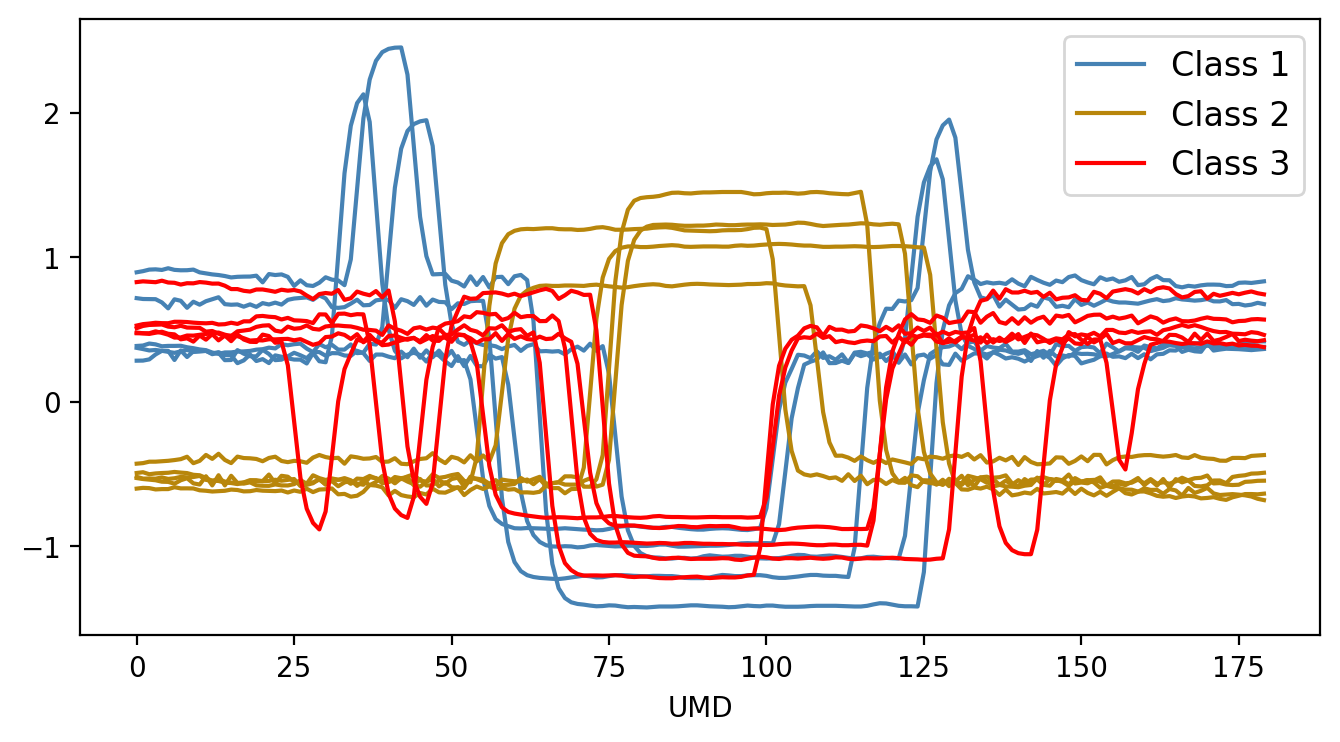

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Assuming you have train_xs, train_ys, and dataset_to_ins
# Loop through your dataset

plt.figure(figsize=(8, 4), dpi=200)

classes = np.unique(train_y)

# Define a list of consistent colors for classes
colors = ['#4682B4', '#B8860B', '#FF0000', '#00CED1', '#9932CC', '#9ACD32', '#696969', '#9370DB', '#FF8C00', '#A9A9A9']
#colors = ['#AEB6BF', '#17202A', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

# Create an empty list to hold the legend labels
legend_labels = []


for j, x in enumerate(classes):
    indices = np.where(train_y == x)[0][:5]
    print(indices)

    for k, y in enumerate(indices):
        line = plt.plot(train_x_aug_shifted[y], color=colors[j], label=f'Class {x}')
        if k == 0:
            legend_labels.append(Line2D([0], [0], color=colors[j], label=f'Class {x}'))

plt.rcParams.update({'font.size': 18})
plt.legend(handles=legend_labels, prop={'size': 12})
plt.xlabel('UMD')
plt.savefig('UMD_shifted.pdf',bbox_inches='tight')
plt.show()
plt.clf()


## Dotted

[0 1 2 3 4]
[12 13 14 15 16]
[24 25 26 27 28]


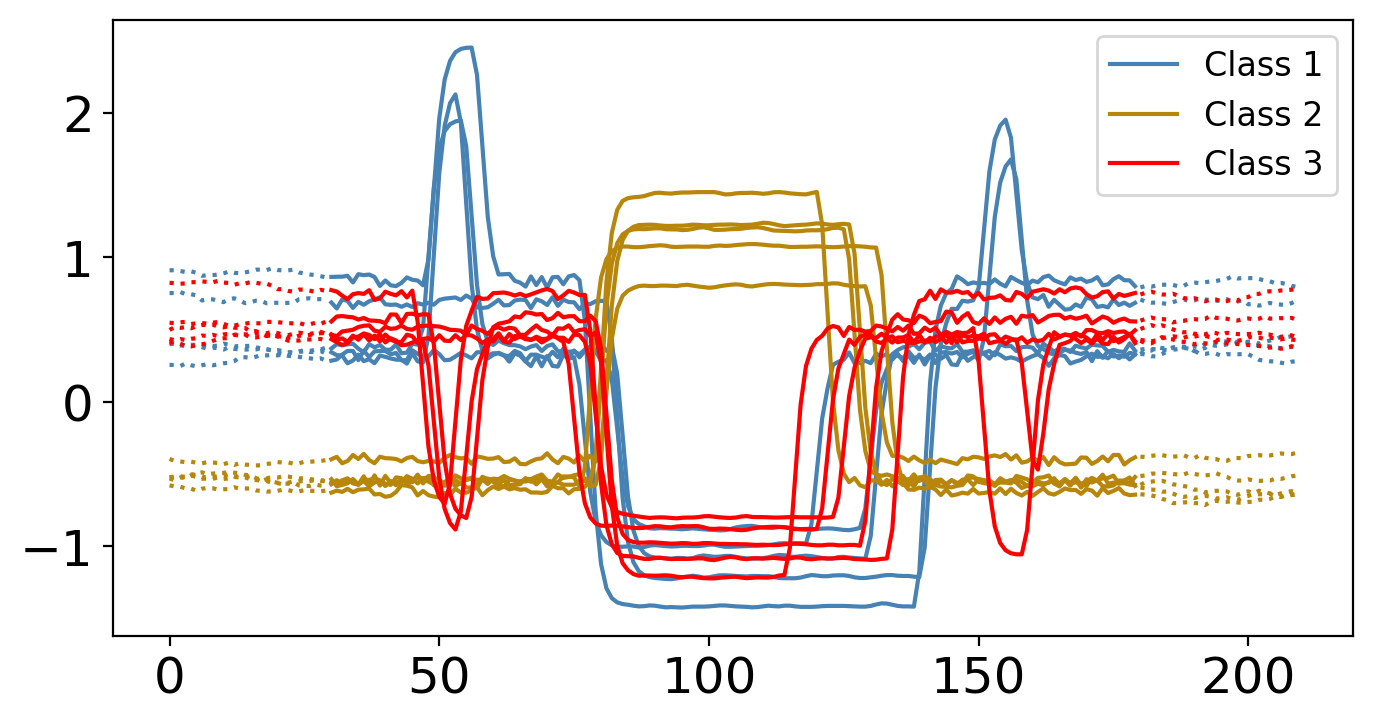

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Assuming you have train_x_aug and train_y
plt.figure(figsize=(8, 4), dpi=200)

classes = np.unique(train_y)

# Define a list of consistent colors for classes
colors = ['#4682B4', '#B8860B', '#FF0000', '#00CED1', '#9932CC', '#9ACD32', '#696969', '#9370DB', '#FF8C00', '#A9A9A9']

# Create an empty list to hold the legend labels
legend_labels = []

for j, x in enumerate(classes):
    indices = np.where(train_y == x)[0][:5]
    print(indices)

    for k, y in enumerate(indices):
        x_vals = train_x_aug[y]
        n_points = len(x_vals)

        # Define the segments
        first_segment = x_vals[:30]
        middle_segment = x_vals[30:n_points-30]
        last_segment = x_vals[n_points-30:]

        # Plot the first segment with a denser dotted line
        plt.plot(
            range(30), first_segment, 
            color=colors[j], 
            linestyle='dotted',  # Custom dash pattern for dense dots
            label=f'Class {x}' if k == 0 else ""
        )

        # Plot the middle segment as solid
        plt.plot(range(30, n_points-30), middle_segment, color=colors[j], linestyle='-')

        # Plot the last segment with a denser dotted line
        plt.plot(
            range(n_points-30, n_points), last_segment, 
            color=colors[j], 
            linestyle='dotted'  # Custom dash pattern for dense dots
        )

        # Add legend label only once per class
        if k == 0:
            legend_labels.append(Line2D([0], [0], color=colors[j], label=f'Class {x}'))

plt.rcParams.update({'font.size': 18})
plt.legend(handles=legend_labels, prop={'size': 12})
# plt.xlabel('UMD')
plt.savefig('UMD_AUG.pdf', bbox_inches='tight')
plt.show()
plt.clf()


[0 1 2 3 4]
[12 13 14 15 16]
[24 25 26 27 28]


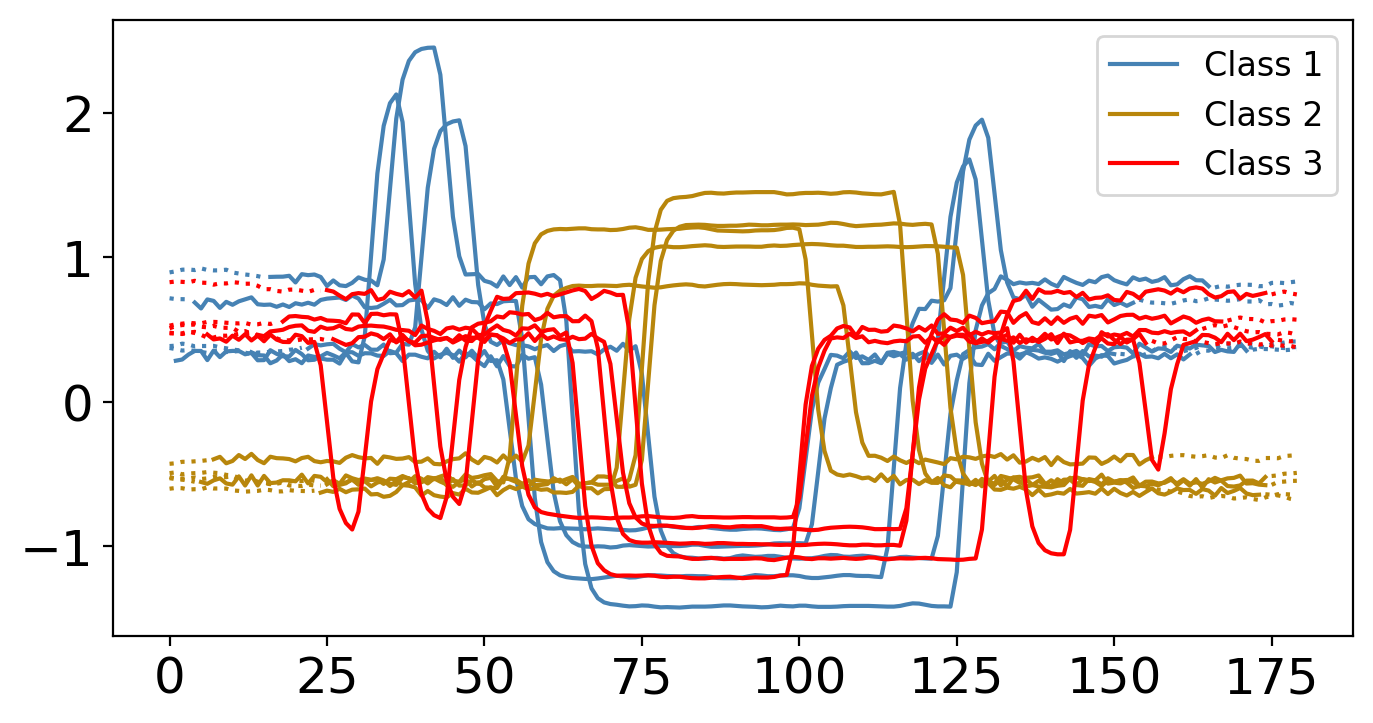

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Assuming you have train_x_aug and train_y
plt.figure(figsize=(8, 4), dpi=200)

classes = np.unique(train_y)

# Define a list of consistent colors for classes
colors = ['#4682B4', '#B8860B', '#FF0000', '#00CED1', '#9932CC', '#9ACD32', '#696969', '#9370DB', '#FF8C00', '#A9A9A9']

# Create an empty list to hold the legend labels
legend_labels = []

for j, x in enumerate(classes):
    indices = np.where(train_y == x)[0][:5]
    print(indices)

    for k, y in enumerate(indices):
        x_vals = train_x_aug_shifted[y]
        n_points = len(x_vals)

        # Define the segments
        first_segment = x_vals[:random_shift_left_list[y]]
        middle_segment = x_vals[random_shift_left_list[y]:n_points-random_shift_right_list[y]]
        last_segment = x_vals[-random_shift_right_list[y]:]

        # Plot the first segment with a denser dotted line
        plt.plot(
            range(random_shift_left_list[y]), first_segment, 
            color=colors[j], 
            linestyle='dotted',  # Custom dash pattern for dense dots
            label=f'Class {x}' if k == 0 else ""
        )

        # Plot the middle segment as solid
        plt.plot(range(random_shift_left_list[y], n_points-random_shift_right_list[y]), middle_segment, color=colors[j], linestyle='-')

        # Plot the last segment with a denser dotted line
        plt.plot(
            range(n_points-random_shift_right_list[y], n_points), last_segment, 
            color=colors[j], 
            linestyle='dotted'  # Custom dash pattern for dense dots
        )

        # Add legend label only once per class
        if k == 0:
            legend_labels.append(Line2D([0], [0], color=colors[j], label=f'Class {x}'))

plt.rcParams.update({'font.size': 18})
plt.legend(handles=legend_labels, prop={'size': 12})
# plt.xlabel('UMD')
plt.savefig('UMD_shifted.pdf', bbox_inches='tight')
plt.show()
plt.clf()


## Gray

[0 1 2 3 4]
[12 13 14 15 16]
[24 25 26 27 28]


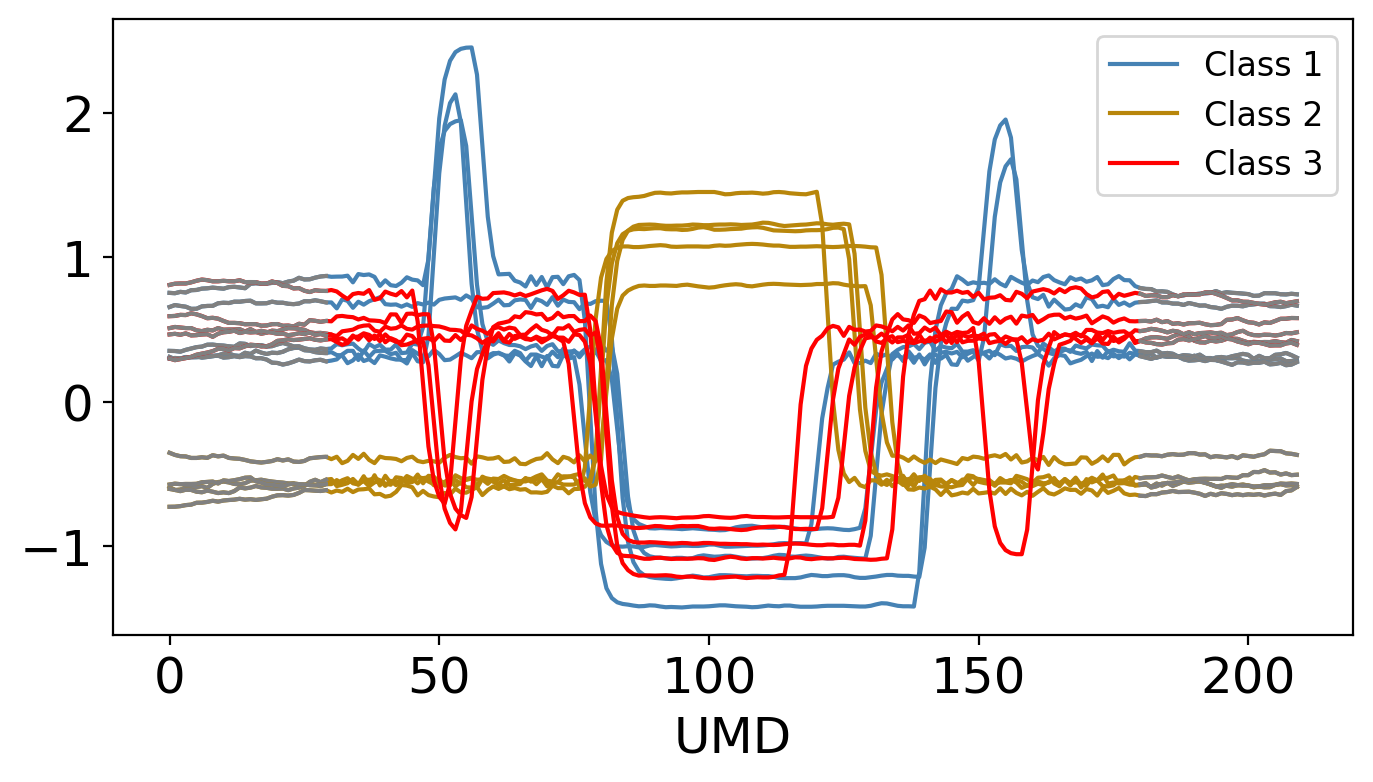

<Figure size 640x480 with 0 Axes>

In [44]:
# Assuming you have train_x_aug and train_y
plt.figure(figsize=(8, 4), dpi=200)

classes = np.unique(train_y)

# Define a list of consistent colors for classes
colors = ['#4682B4', '#B8860B', '#FF0000', '#00CED1', '#9932CC', '#9ACD32', '#696969', '#9370DB', '#FF8C00', '#A9A9A9']
highlight_color = 'gray'  # Color for the first and last 30 points

# Create an empty list to hold the legend labels
legend_labels = []

for j, x in enumerate(classes):
    indices = np.where(train_y == x)[0][:5]
    print(indices)

    for k, y in enumerate(indices):
        x_vals = train_x_aug[y]
        n_points = len(x_vals)

        # Plot the entire line with the main color
        plt.plot(range(n_points), x_vals, color=colors[j], label=f'Class {x}' if k == 0 else "")

        # Overlay the first 30 points with gray
        plt.plot(range(30), x_vals[:30], color=highlight_color)

        # Overlay the last 30 points with gray
        plt.plot(range(n_points-30, n_points), x_vals[n_points-30:], color=highlight_color)

        # Add legend label only once per class
        if k == 0:
            legend_labels.append(Line2D([0], [0], color=colors[j], label=f'Class {x}'))

plt.rcParams.update({'font.size': 18})
plt.legend(handles=legend_labels, prop={'size': 12})
plt.xlabel('UMD')
plt.savefig('UMD_shifted.pdf', bbox_inches='tight')
plt.show()
plt.clf()

[0 1 2 3 4]
[12 13 14 15 16]
[24 25 26 27 28]


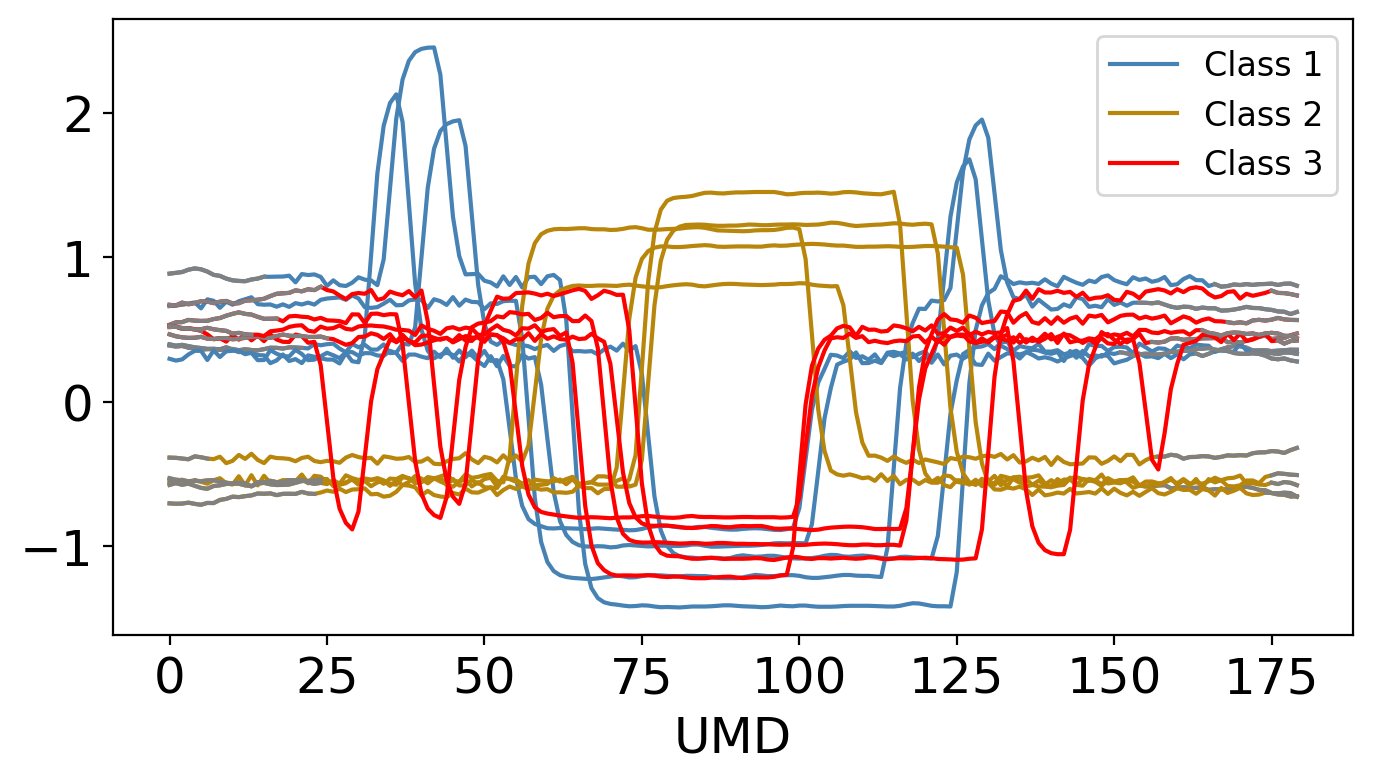

<Figure size 640x480 with 0 Axes>

In [63]:
# Assuming you have train_x_aug and train_y
plt.figure(figsize=(8, 4), dpi=200)

classes = np.unique(train_y)

# Define a list of consistent colors for classes
colors = ['#4682B4', '#B8860B', '#FF0000', '#00CED1', '#9932CC', '#9ACD32', '#696969', '#9370DB', '#FF8C00', '#A9A9A9']
highlight_color = 'gray'  # Color for the first and last 30 points

# Create an empty list to hold the legend labels
legend_labels = []

for j, x in enumerate(classes):
    indices = np.where(train_y == x)[0][:5]
    print(indices)

    for k, y in enumerate(indices):
        x_vals = train_x_aug_shifted[y]
        n_points = len(x_vals)

        # Plot the entire line with the main color
        plt.plot(range(n_points), x_vals, color=colors[j], label=f'Class {x}' if k == 0 else "")

        # Overlay the first n points with gray
        plt.plot(range(random_shift_left_list[y]), x_vals[:random_shift_left_list[y]], color=highlight_color)

        # Overlay the last n points with gray
        plt.plot(range(n_points-random_shift_right_list[y], n_points), x_vals[-random_shift_right_list[y]:], color=highlight_color)

        # Add legend label only once per class
        if k == 0:
            legend_labels.append(Line2D([0], [0], color=colors[j], label=f'Class {x}'))

plt.rcParams.update({'font.size': 18})
plt.legend(handles=legend_labels, prop={'size': 12})
plt.xlabel('UMD')
plt.savefig('UMD_shifted.pdf', bbox_inches='tight')
plt.show()
plt.clf()